### Accompanying notebook for Habitable Planets selection problem (student version; filled)

In [ ]:
#Author: Viviana Acquaviva

#License: BSD but really should be TBD - just be nice.

In [1]:
import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from scipy import stats
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn import neighbors

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

In [ ]:
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
#Data from http://phl.upr.edu/projects/habitable-exoplanets-catalog/data/database

In [4]:
df = pd.read_csv('phl_exoplanet_catalog.csv', sep = ',')

In [5]:
df.columns

Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

In [6]:
df.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


In [7]:
df.groupby('P_HABITABLE').count()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
P_HABITABLE,,,,,,,,,,,,,,,,,,,,,
0,3993,3993,1575,1444,1444,3101,3067,3067,3993,3993,...,3993,3993,3666,3666,3993,3993,3993,3993,3993,3923
1,21,21,16,16,16,9,9,9,21,21,...,21,21,21,21,21,21,21,21,21,21
2,34,34,7,7,7,29,29,29,34,34,...,34,34,34,34,34,34,34,34,34,34


#### Start by lumping together Probably and Possibly Habitable

In [8]:
bindf = df.drop('P_HABITABLE', axis = 1) #This has the binary classification

In [9]:
bindf['P_HABITABLE'] = (np.logical_or((df.P_HABITABLE == 1) , (df.P_HABITABLE == 2))) #turn into binary

bindf['P_HABITABLE'] = bindf['P_HABITABLE'].astype(int)

In [10]:
bindf.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_HABITABLE
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29,0
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53,0
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83,0
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93,0
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66,0


### Let's select some columns.

S_MAG - star magnitude 

S_DISTANCE - star distance (parsecs)

S_METALLICITY - star metallicity (dex)

S_MASS - star mass (solar units)

S_RADIUS - star radius (solar units)

S_AGE - star age (Gy)

S_TEMPERATURE - star effective temperature (K)

S_LOG_G - star log(g)

P_DISTANCE - planet mean distance from the star (AU) 

P_FLUX - planet mean stellar flux (earth units)

P_PERIOD - planet period (days) 

### Going with the same features as Chapter 2.

In [11]:
final_features = bindf[['S_MASS', 'P_PERIOD', 'P_DISTANCE']] 

In [12]:
targets = bindf.P_HABITABLE

In [13]:
final_features

,S_MASS,P_PERIOD,P_DISTANCE
0,2.70,326.030000,1.324418
1,2.78,516.219970,1.534896
2,2.20,185.840000,0.830000
3,0.90,1773.400000,3.130558
4,1.08,798.500000,2.043792
5,2.30,993.300000,2.608320
6,0.85,NaN,330.000000
7,0.99,30.350600,0.190168
8,1.54,452.800000,1.338399
9,1.54,883.000000,2.167464


### Number one rule of data science: know your data.

In [14]:
final_features.shape

(4048, 3)

In [15]:
final_features.describe()

,S_MASS,P_PERIOD,P_DISTANCE
count,3283.000000,3.938000e+03,3978.000000
mean,1.003838,2.309342e+03,4.047677
std,0.652903,1.167012e+05,62.435994
min,0.010000,9.070629e-02,0.004408
25%,0.810000,4.497336e+00,0.053110
50%,0.970000,1.187053e+01,0.103000
75%,1.130000,4.186661e+01,0.263415
max,23.560000,7.300000e+06,2500.000000


#### There are some NaNs, e.g. shown by the "describe" property, which only counts numerical values.

### Counting missing data...

In [16]:
for i in range(final_features.shape[1]):
    print(len(np.where(final_features.iloc[:,i].isna())[0]))

765
110
70


### ...and getting rid of them (Note: there are better imputing strategies!)

In [17]:
final_features = final_features.dropna(axis = 0) #gets rid of any instance with at least one NaN in any column
final_features.shape

(3180, 3)

### Searching for outliers

Method 1 - plot!

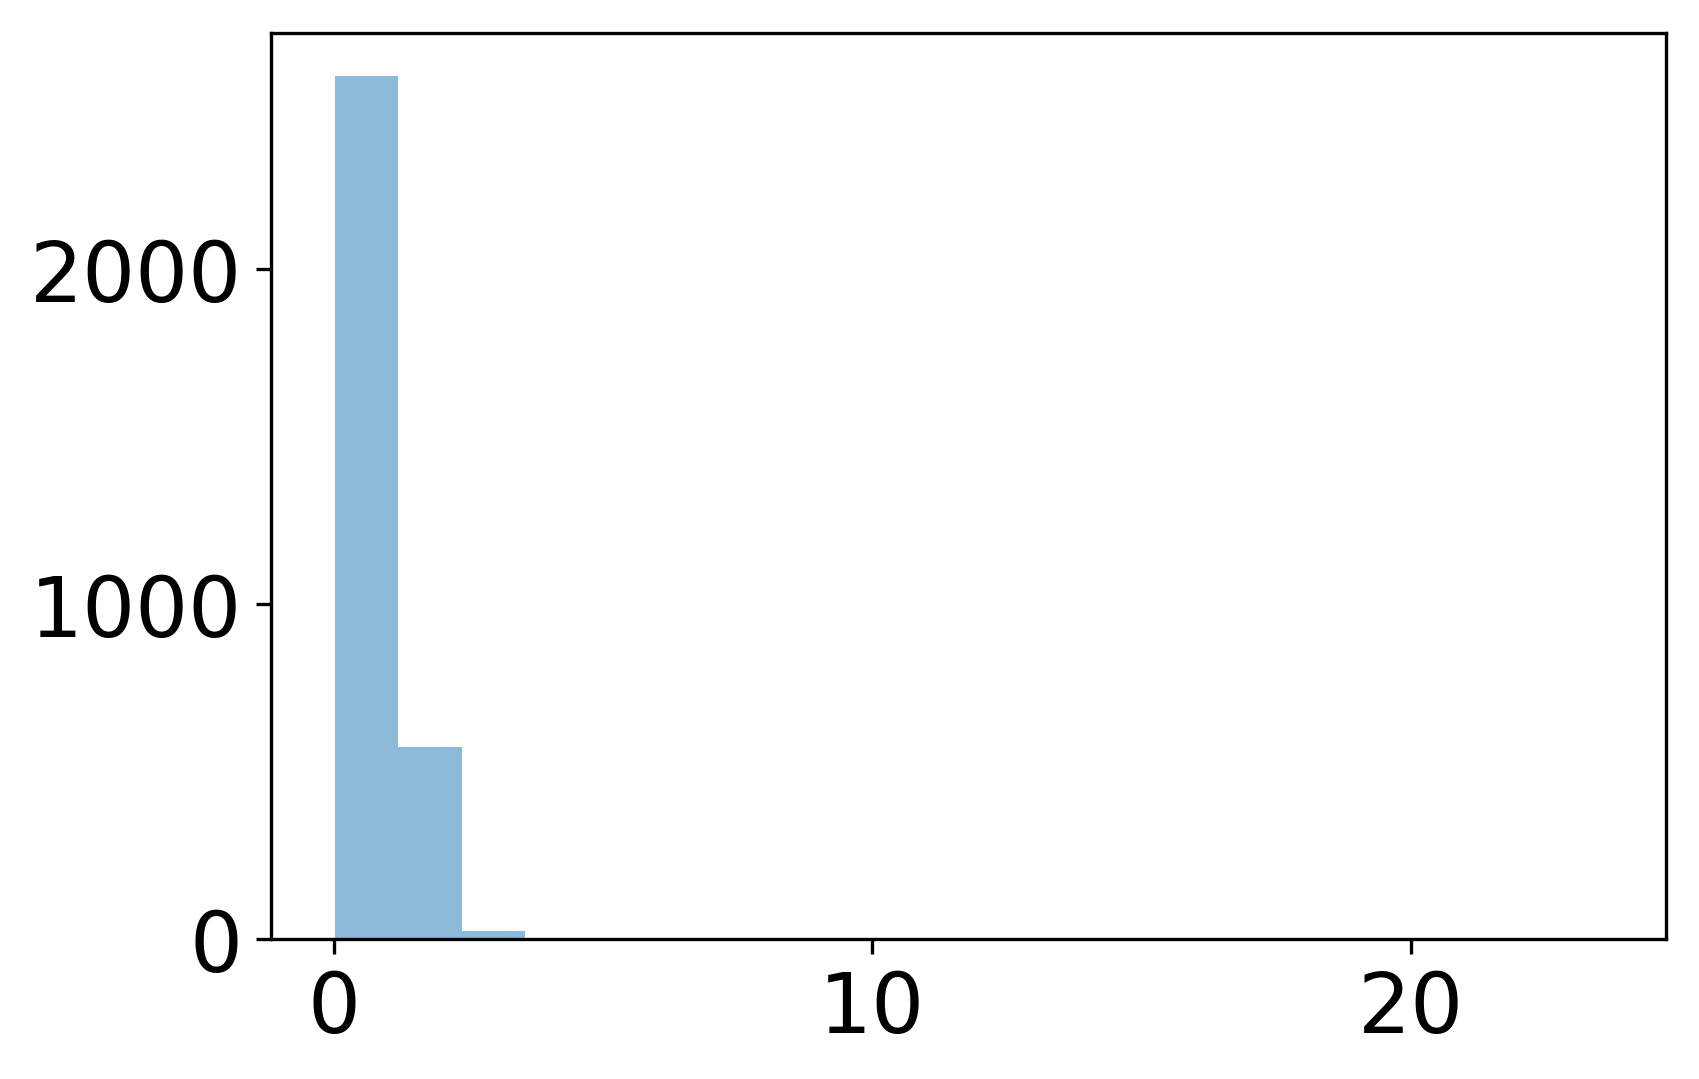

In [18]:
plt.hist(final_features.iloc[:,0], bins = 20, alpha = 0.5);

There is a remarkable outlier; The same happens for other features. But we could have also known from the difference between mean and median (which, in fact, is even more pronounced for orbital distance and period).

In [19]:
final_features.describe()

,S_MASS,P_PERIOD,P_DISTANCE
count,3180.000000,3.180000e+03,3180.000000
mean,1.018217,2.763531e+03,0.677663
std,0.649450,1.298246e+05,5.962161
min,0.020000,9.070629e-02,0.004408
25%,0.820000,4.175797e+00,0.050453
50%,0.970000,1.155546e+01,0.097369
75%,1.130000,5.474041e+01,0.274581
max,23.560000,7.300000e+06,243.000000


In [20]:
final_features = final_features[(np.abs(stats.zscore(final_features)) < 5).all(axis=1)] 

#This eliminates > 5 sigma outliers; however it counts from the mean so it might not be ideal

In [21]:
targets = targets[final_features.index]

### Now reset index.

In [22]:
final_features = final_features.reset_index(drop=True)

In [23]:
final_features

,S_MASS,P_PERIOD,P_DISTANCE
0,2.70,326.030000,1.324418
1,2.78,516.219970,1.534896
2,2.20,185.840000,0.830000
3,0.90,1773.400000,3.130558
4,1.08,798.500000,2.043792
5,2.30,993.300000,2.608320
6,0.99,30.350600,0.190168
7,1.54,452.800000,1.338399
8,1.54,883.000000,2.167464
9,0.48,416.000000,0.920000


### And don't forget to do the same for the label vector.

In [24]:
targets = targets.reset_index(drop=True)

In [25]:
targets

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3141    0
3142    0
3143    0
3144    0
3145    0
3146    0
3147    0
3148    0
3149    0
3150    0
3151    0
3152    0
3153    0
3154    0
3155    0
3156    0
3157    0
3158    1
3159    0
3160    0
3161    0
3162    0
3163    0
3164    0
3165    0
3166    1
3167    0
3168    0
3169    1
3170    1
Name: P_HABITABLE, Length: 3171, dtype: int64

### Comparing the shapes, we can see that 9 outliers were eliminated.

In [26]:
targets.shape

(3171,)

### Check balance of data set

In [ ]:
#Simple way: count 0/1s, get fraction of total

In [26]:
np.sum(targets)/len(targets)

0.01639861242510249

In [27]:
np.bincount(targets) #this shows the distribution of the two classes

array([3119,   52])

### We can also explore the data by class, to get a sense of how the two classes differ from one another. For this, we need to concatenate the feature//labels data frames so we group objects label.

In [ ]:
#This generates a "view", not a new data frame

pd.concat([final_features, targets], axis=1)

In [ ]:
#We can group by label and take a look at summary statistics

pd.concat([final_features, targets], axis=1).groupby('P_HABITABLE').describe(percentiles = [])

### Ok, this all for preliminary data exploration. Time to deploy!

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(final_features,targets,random_state=2)

In [29]:
Xtrain.shape, Xtest.shape

((2378, 3), (793, 3))

We can just take a look at the train/test sets.

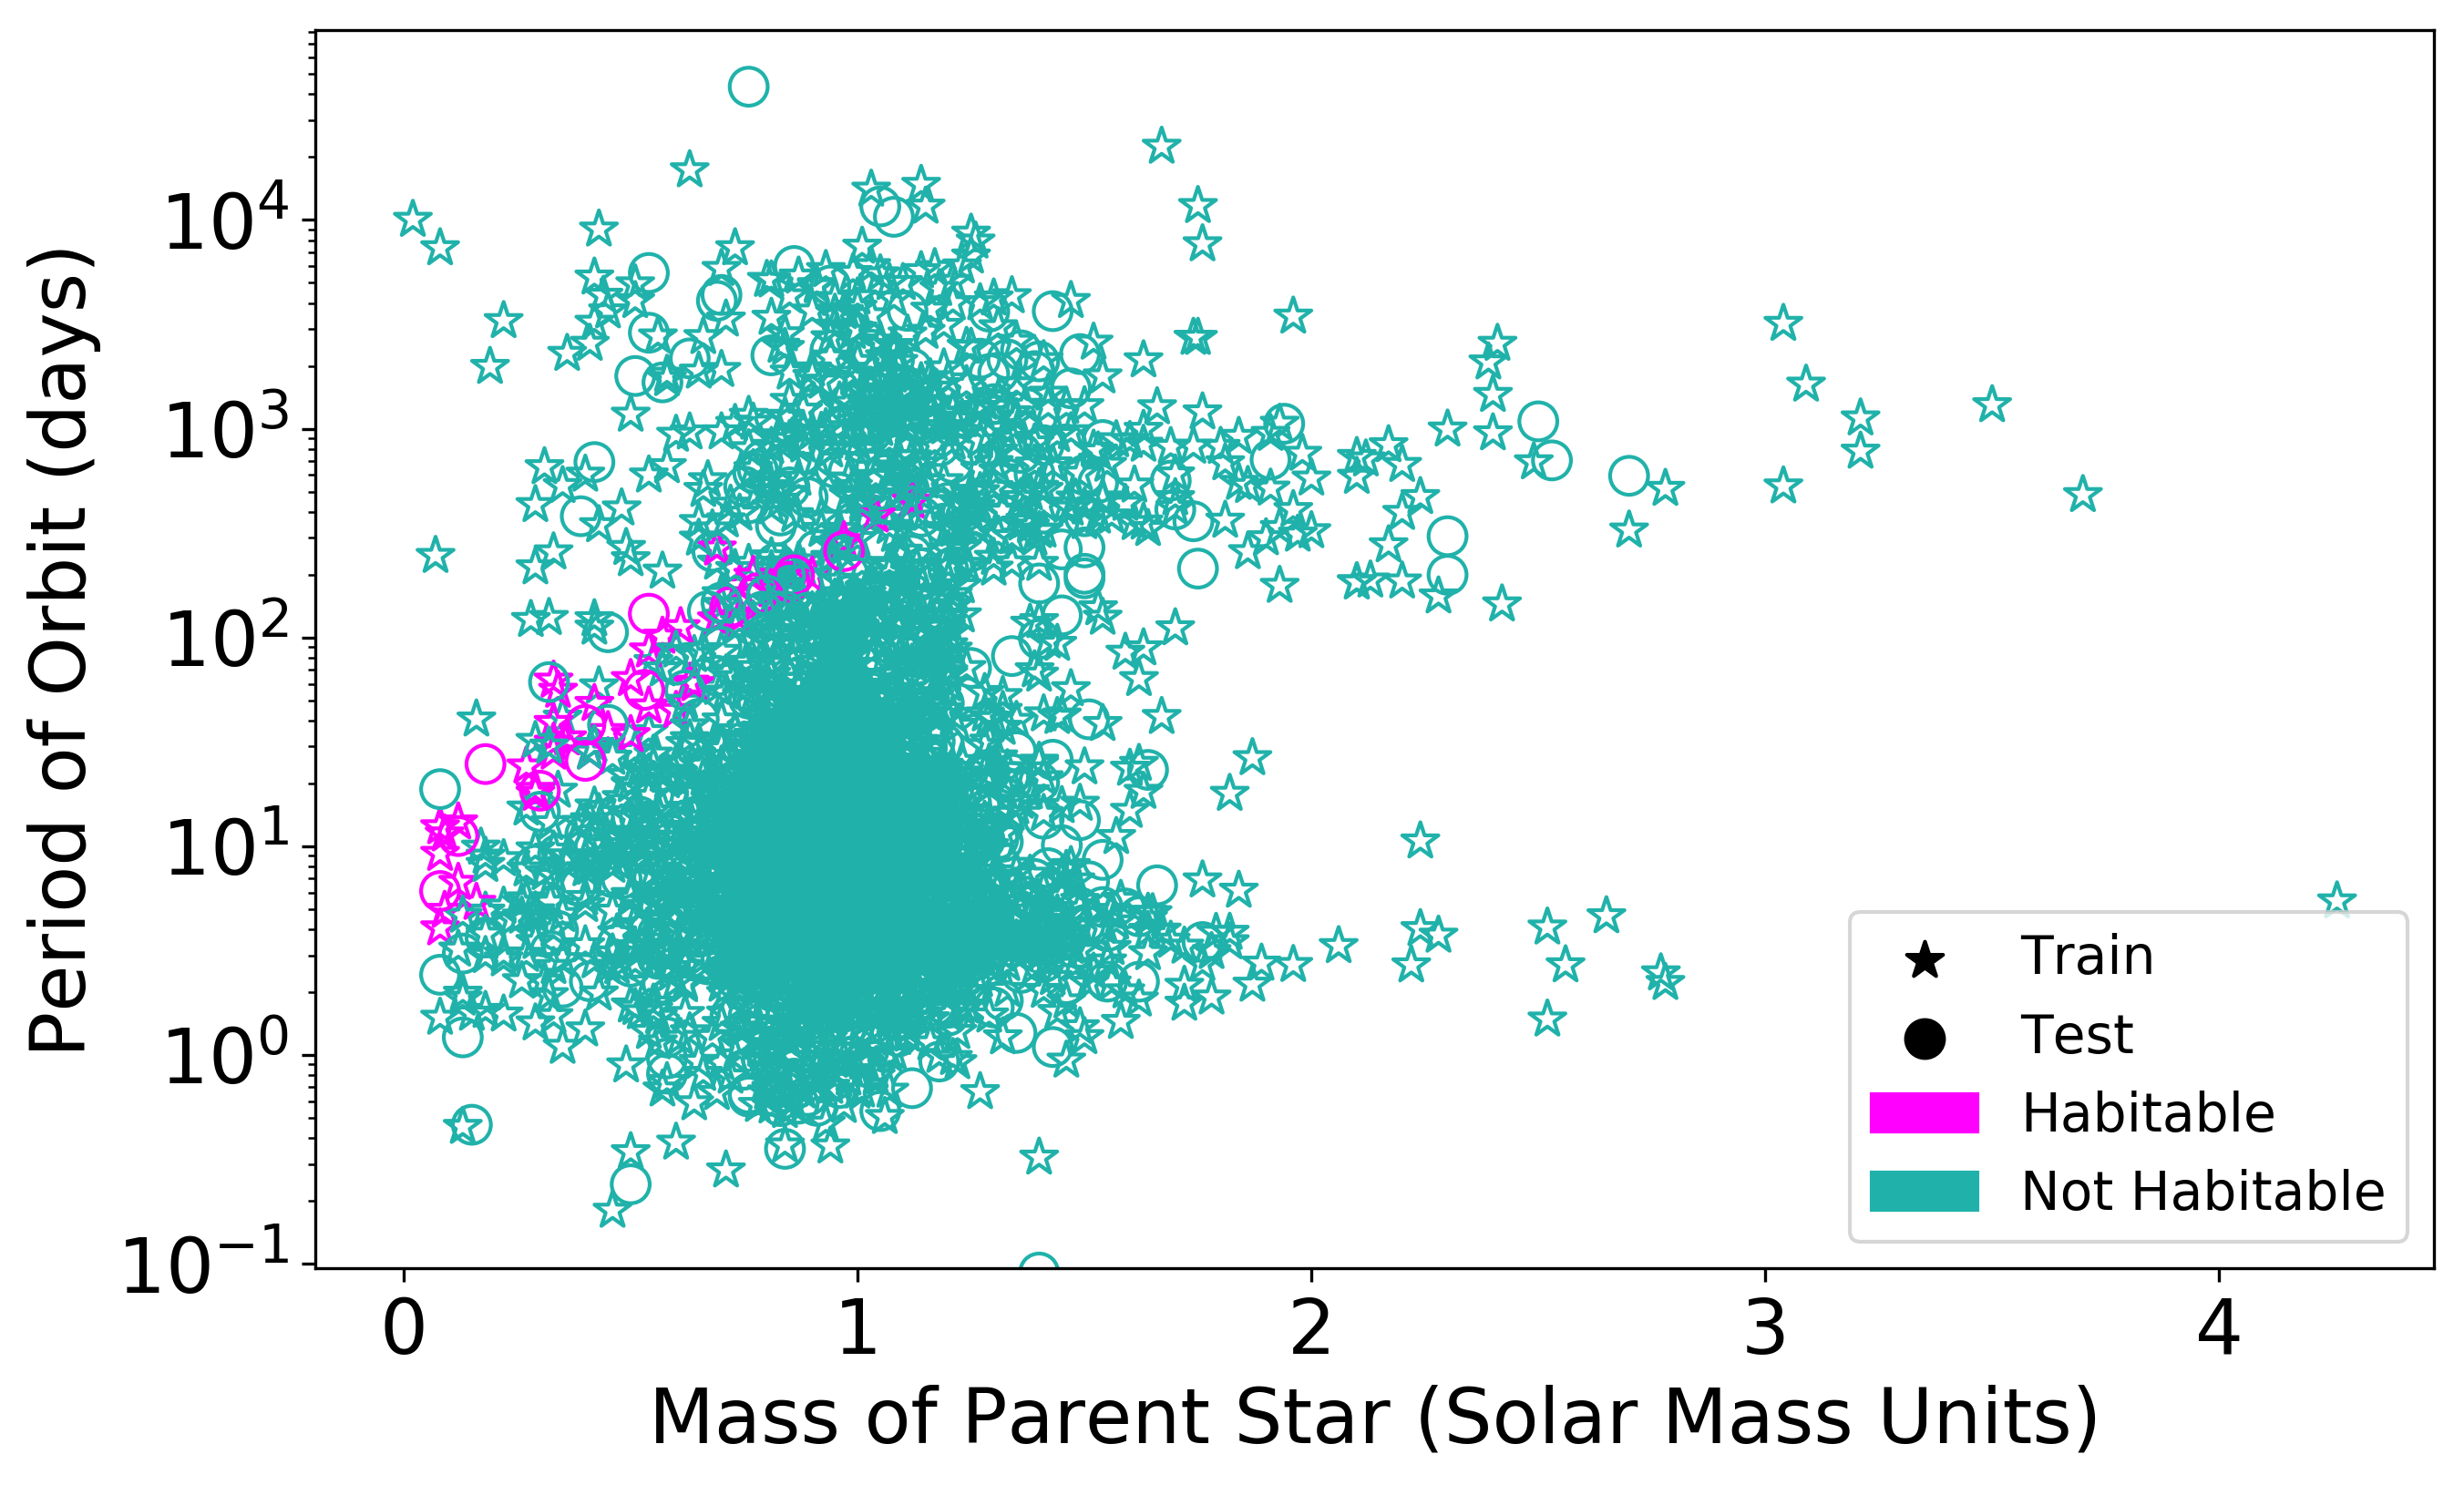

In [30]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
a = plt.scatter(Xtrain['S_MASS'], Xtrain['P_PERIOD'], marker = '*',\
            c = ytrain, s = 100, cmap=cmap, label = 'Train')

a.set_facecolor('none')

a = plt.scatter(Xtest['S_MASS'], Xtest['P_PERIOD'], marker = 'o',\
            c = ytest, s = 100, cmap=cmap, label = 'Test')

plt.legend();

a.set_facecolor('none')

plt.yscale('log')
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')



ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[1].set_color('k')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'lower right', fontsize = 14)

#plt.savefig('LargeHPTrainTest.png',dpi=300)

### Questions: 

- Based on this graph, would you expect DT or kNN to perform better? Why?
    
- What kind of performance can we expect (qualitatively, is the information sufficient?) Do you expect to have latent (hidden) variables that might affect the outcome beyond those that we have?



In [32]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=3)

#### Let's visualize the graph!

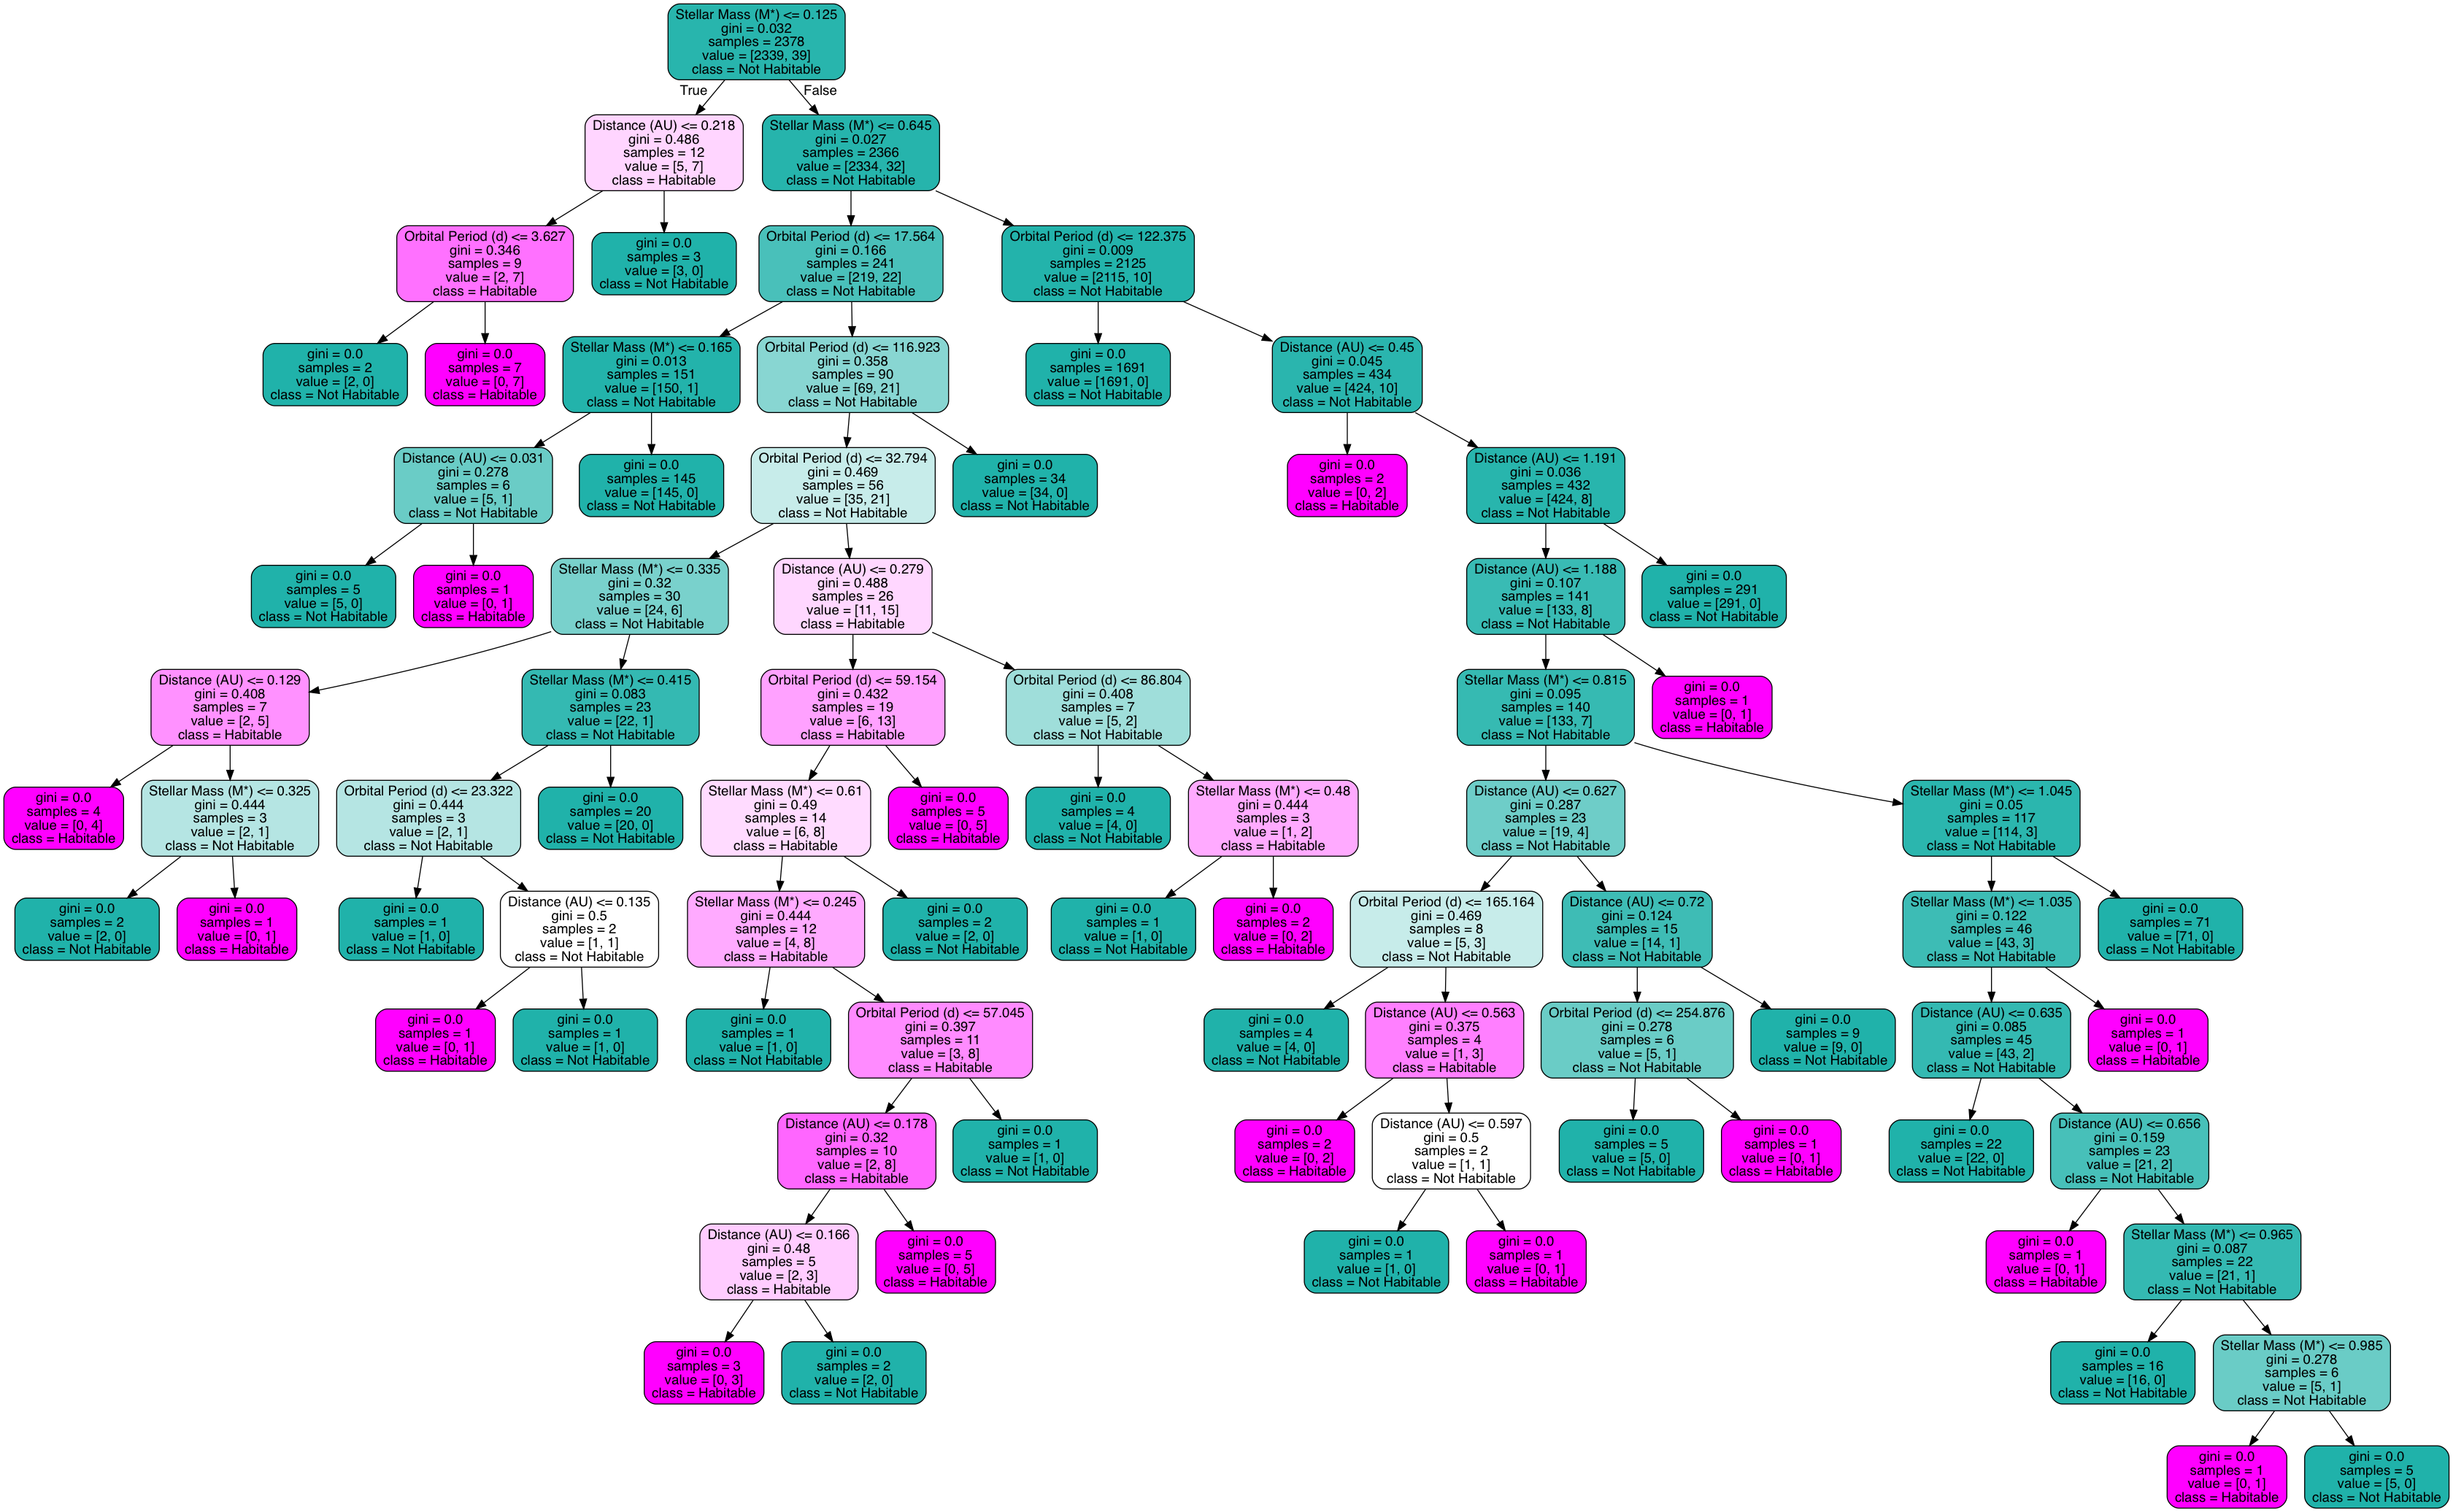

In [33]:
# Reminder: The features are always randomly permuted at each split. 
# Therefore, the best found split may vary, even with the same training data 
# and max_features=n_features, if the improvement of the criterion is identical 
# for several splits enumerated during the search of the best split. 
# To obtain a deterministic behaviour during fitting, random_state has to be fixed.

dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names = ['Not Habitable','Habitable'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]
        
        values = [int(255 * v / sum(values)) for v in values]
            
        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)

#graph.write_png('Graph.png',dpi = 300)
        
Image(graph.create_png())

### Question: Can you predict the accuracy score on the train set?

### Let's take a look at train/test scores.

In [34]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain)))
print(metrics.accuracy_score(ytest,model.predict(Xtest)))

1.0
0.987389659520807


This looks pretty high, but how does it compare with the accuracy of a lazy classifier that places everything in the "not habitable" category?

In [35]:
#Dummy classifier

print(metrics.accuracy_score(ytest,np.zeros(len(ytest))))

0.9836065573770492


### We can look at other metrics.

In [36]:
print(metrics.precision_score(ytest,model.predict(Xtest)))

0.6153846153846154


In [37]:
print(metrics.recall_score(ytest,model.predict(Xtest)))

0.6153846153846154


Not perfect, but not horrible.

In [ ]:
np.sum(model.predict(Xtest)), np.sum(ytest)

In [38]:
print(metrics.confusion_matrix(ytest,model.predict(Xtest)))

[[775   5]
 [  5   8]]


### You know what we would need in order to understand exactly how the model is working? A confusion matrix!

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="green" if i == j else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### We can plot the confusion matrix (note that so far, we have only looked at one test fold)

Confusion matrix, without normalization
[[775   5]
 [  5   8]]


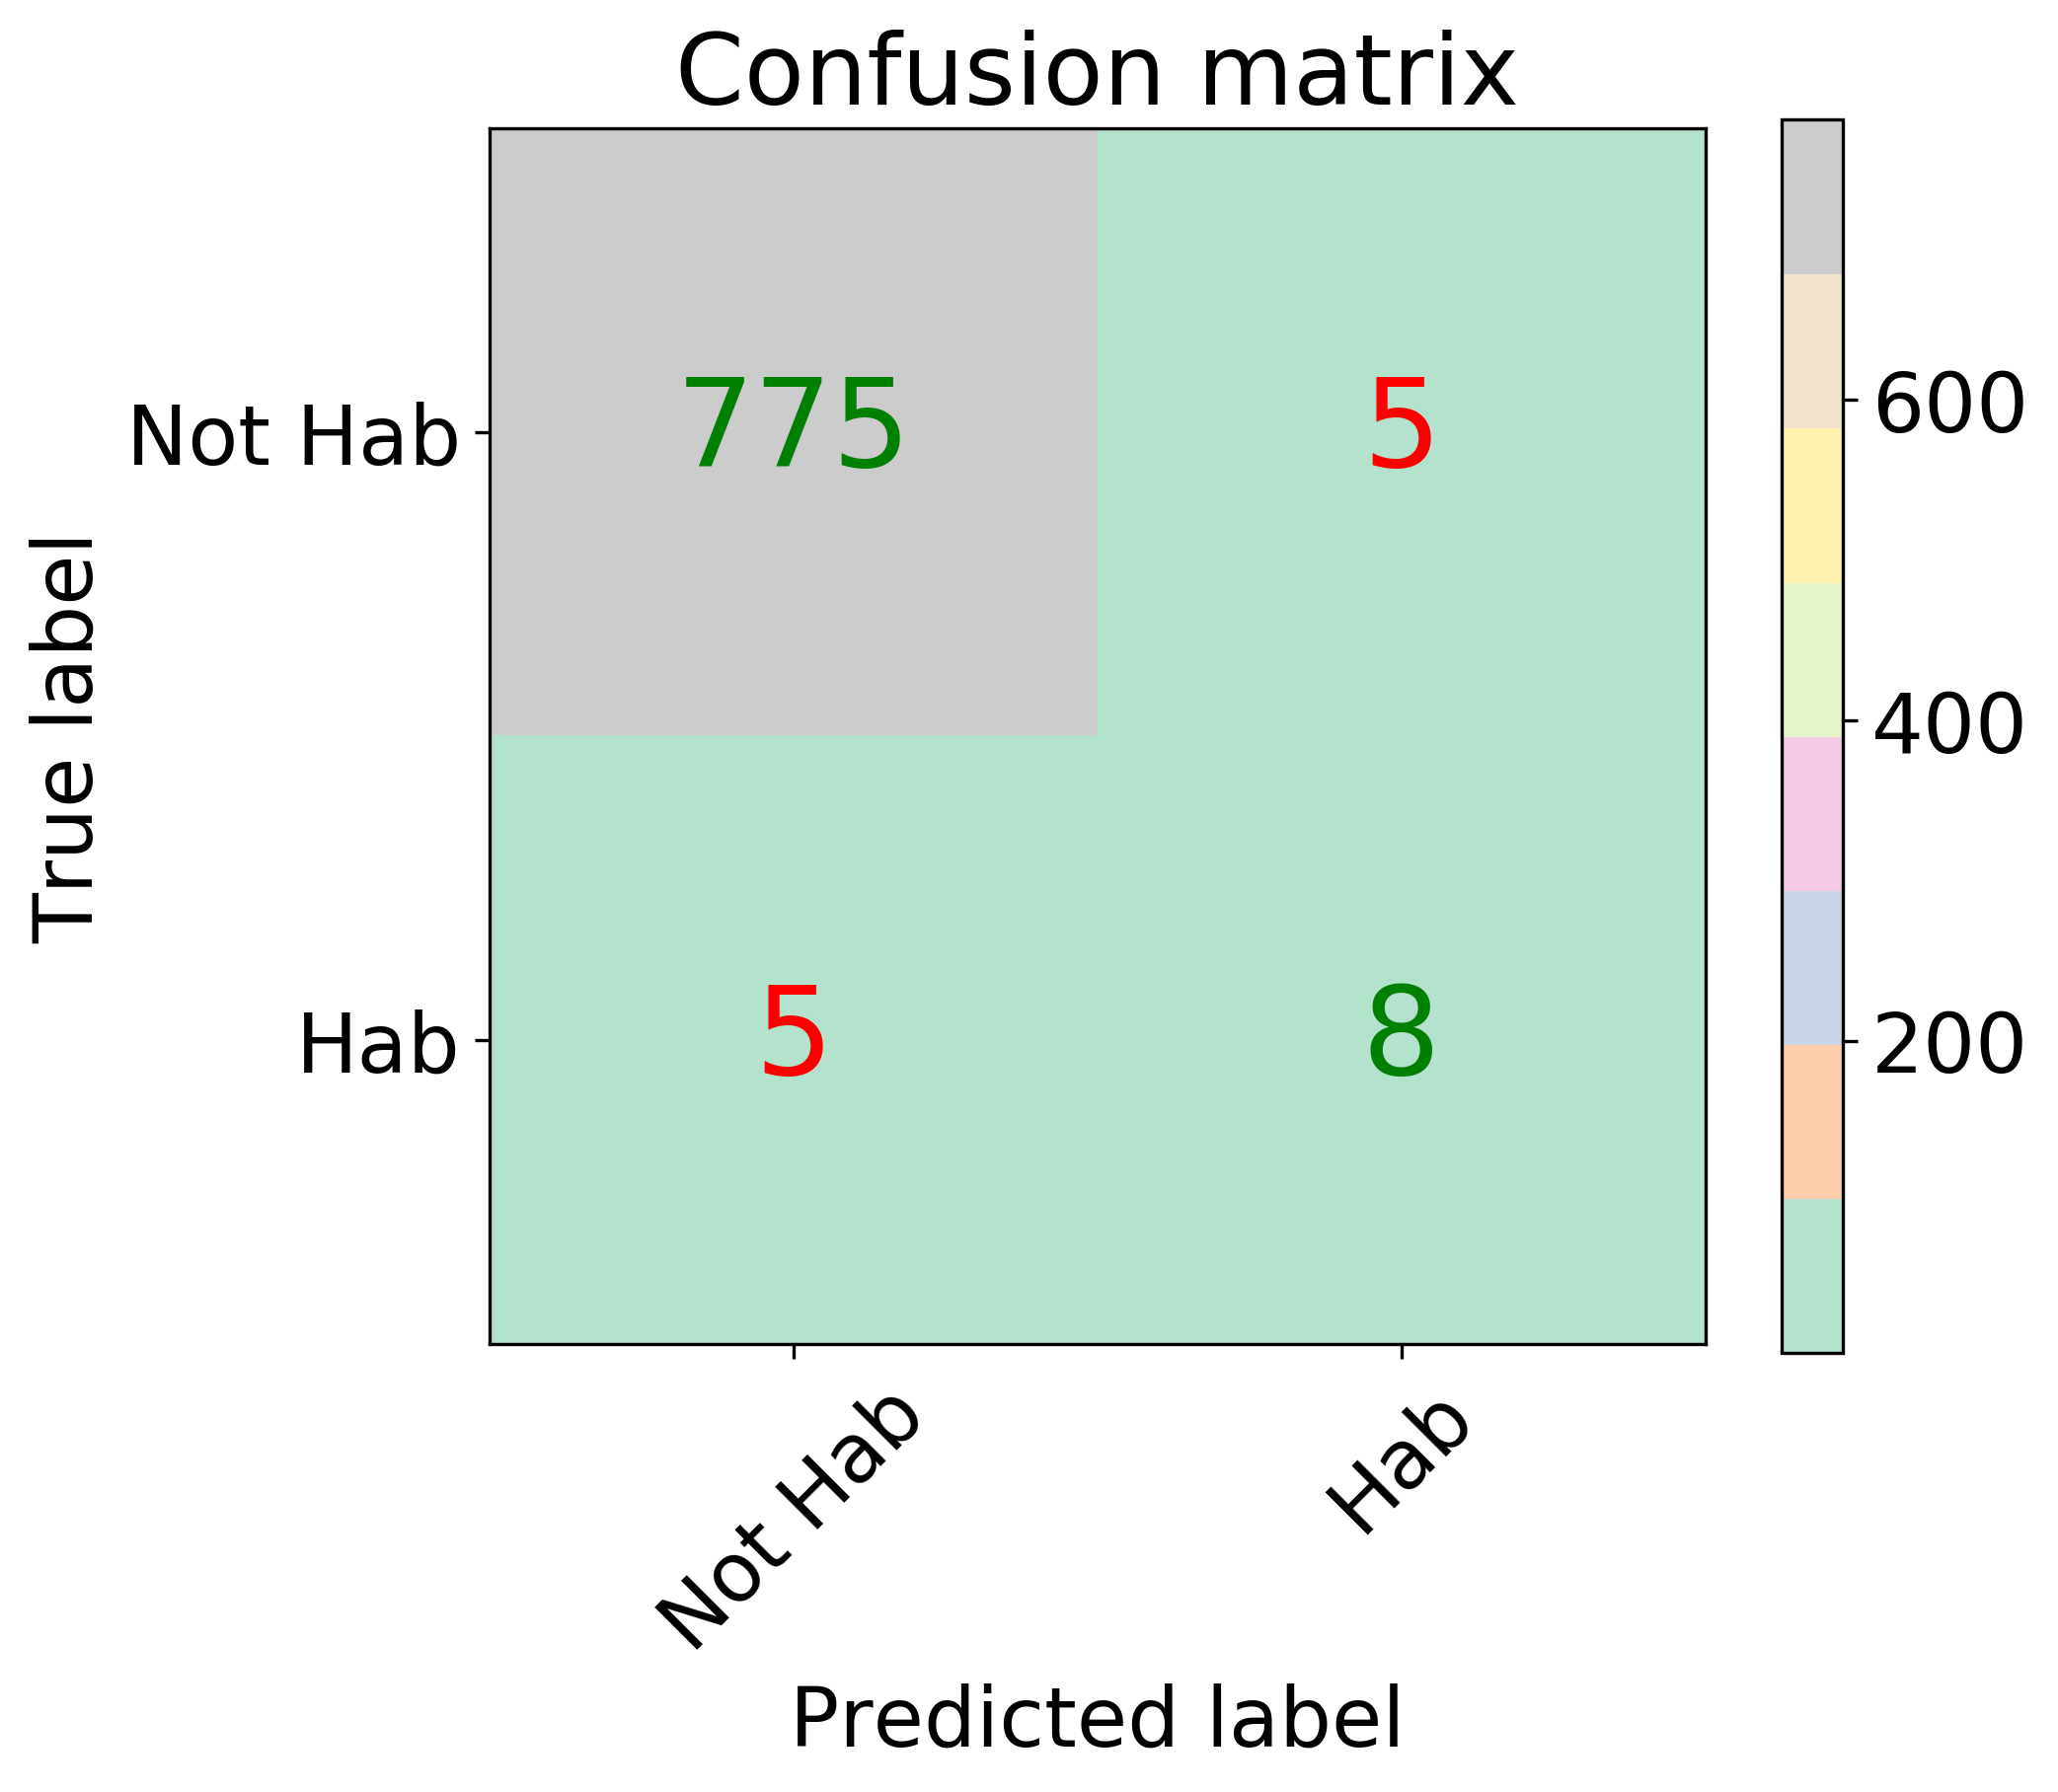

In [40]:
cm = metrics.confusion_matrix(ytest,model.predict(Xtest))
plot_confusion_matrix(cm, ['Not Hab','Hab'], cmap = plt.cm.Pastel2)
#plt.savefig('CM.png', dpi = 300)

### Three flavors of k-fold Cross Validation.

Note: you can fix the random seed for exactly reproducible behavior.

In [42]:
# This is the standard version. Important: it doesn't shuffle the data, 
# so if your positive examples are all at the beginning or all the end, it might lead to disastrous results.

cv1 = KFold(n_splits = 5)

#This is v2: shuffling added (recommended!)

cv2 = KFold(shuffle = True, n_splits = 5, random_state=5)

# STRATIFICATION ensures that the class distributions in each split resembles those of the 
# entire data set (mightscores1['test_score'].mean(), scores1['test_score'].std()scores1['test_score'].mean(), scores1['test_score'].std()### Effect of stratification: let's look at the class count in each set of splits.

cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)

### Effect of stratification: let's look at the class count in each set of splits.

In [43]:
for train, test in cv1.split(final_features, targets): #Just how they are in original data set
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [2493   43]   |   test -  [626   9]
train -  [2491   46]   |   test -  [628   6]
train -  [2488   49]   |   test -  [631   3]
train -  [2506   31]   |   test -  [613  21]
train -  [2498   39]   |   test -  [621  13]


In [44]:
for train, test in cv2.split(final_features, targets): #One random selection
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [2491   45]   |   test -  [628   7]
train -  [2496   41]   |   test -  [623  11]
train -  [2498   39]   |   test -  [621  13]
train -  [2493   44]   |   test -  [626   8]
train -  [2498   39]   |   test -  [621  13]


In [45]:
for train, test in cv3.split(final_features, targets): #One adjusted-for random selection
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(targets.loc[train]), np.bincount(targets.loc[test])))

train -  [2495   41]   |   test -  [624  11]
train -  [2495   42]   |   test -  [624  10]
train -  [2495   42]   |   test -  [624  10]
train -  [2495   42]   |   test -  [624  10]
train -  [2496   41]   |   test -  [623  11]


#### The handy function cross\_validate provides the scores (specified by the chosen scoring parameter), in dictionary form.

In [46]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'accuracy')

scores2 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv2, scoring = 'accuracy')

scores3 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv3, scoring = 'accuracy')

In [47]:
scores1

{'fit_time': array([0.01491189, 0.01325631, 0.01031923, 0.01084065, 0.00609016]),
 'score_time': array([0.00333595, 0.01163864, 0.00189185, 0.00200605, 0.00553584]),
 'test_score': array([0.97637795, 0.98422713, 0.99053628, 0.97160883, 0.9873817 ])}

#### We can now calculate an average and standard deviation.

In [48]:
scores1['test_score'].mean(), scores1['test_score'].std()

(0.9820263791947144, 0.007019560729263612)

In [49]:
scores2['test_score'].mean(), scores2['test_score'].std()

(0.9823383591246678, 0.007626007843565688)

In [50]:
scores3['test_score'].mean(), scores3['test_score'].std()

(0.9829702675178222, 0.004395251013706688)

#### Question: are the differences statistically significant?

### Let's now use recall as our scoring parameter. Will the model change?

In [51]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'recall')

scores2 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv2, scoring = 'recall')

scores3 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv3, scoring = 'recall')

In [52]:
print(scores1['test_score'].mean(), scores1['test_score'].std())
print(scores2['test_score'].mean(), scores2['test_score'].std())
print(scores3['test_score'].mean(), scores3['test_score'].std())

0.5554334554334555 0.23750855993840658
0.42784715284715286 0.1639500423531766
0.40545454545454546 0.10246547493531179


### If desired, I can ask for the train scores as well. This is very helpful when diagnosing bias vs variance.

In [53]:
scores1 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv1, scoring = 'recall', \
                         return_train_score = True)

scores2 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv2, scoring = 'recall', \
                         return_train_score = True)

scores3 = cross_validate(DecisionTreeClassifier(), final_features, targets, cv = cv3, scoring = 'recall', 
                         return_train_score = True)

In [54]:
print(scores1['test_score'].mean(), scores1['train_score'].mean())
print(scores2['test_score'].mean(), scores2['train_score'].mean())
print(scores3['test_score'].mean(), scores3['train_score'].mean())

0.6173382173382173 1.0
0.5017982017982018 1.0
0.4454545454545455 1.0


### The cross\_validate function is useful to calculate the score, but does not produce predicted labels.

#### These can be obtained by using the cross\_val\_predict function, which saves the predictions for each of the k test folds, and compiles them together.

In [55]:
model1 = DecisionTreeClassifier(random_state=3)
scores1 = cross_val_score(model1, final_features, targets, cv = cv1, scoring = 'accuracy')
y1 = cross_val_predict(model1, final_features, targets, cv = cv1)

In [67]:
y1

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
np.sum(y1) #trick to see how many planets are predicted to be habitable (predicted label = 1)

54

In case you don't believe that the model is the same, let's change the scoring parameter and train it again:

In [59]:
model2 = DecisionTreeClassifier(random_state=3)
scores2 = cross_val_score(model2, final_features, targets, cv = cv1, scoring = 'recall')
y2 = cross_val_predict(model2, final_features, targets, cv = cv1)

In [60]:
np.sum(y2)

54

In [62]:
np.sum(y1-y2)

0

In [63]:
metrics.confusion_matrix(targets,y1)

array([[3083,   36],
       [  34,   18]])

In [64]:
metrics.confusion_matrix(targets,y2)

array([[3083,   36],
       [  34,   18]])

However, things may change if I use a different cross validation scheme:

In [68]:
model1 = DecisionTreeClassifier(random_state=3)
scores1 = cross_val_score(model1, final_features, targets, cv = cv1, scoring = 'accuracy')
y1 = cross_val_predict(model1, final_features, targets, cv = cv1)

In [69]:
model2 = DecisionTreeClassifier(random_state=3)
scores2 = cross_val_score(model2, final_features, targets, cv = cv2, scoring = 'accuracy')
y2 = cross_val_predict(model2, final_features, targets, cv = cv2)

In [70]:
np.sum(y1-y2)

2

In [ ]:
np.sum(y1)

In [71]:
metrics.confusion_matrix(targets,y1)

array([[3083,   36],
       [  34,   18]])

In [72]:
metrics.confusion_matrix(targets,y2)

array([[3091,   28],
       [  28,   24]])

In [73]:
model3 = DecisionTreeClassifier(random_state=3)
scores3 = cross_val_score(model3, final_features, targets, cv = cv3, scoring = 'accuracy')
y3 = cross_val_predict(model3, final_features, targets, cv = cv3)

In [74]:
metrics.confusion_matrix(targets,y3)

array([[3093,   26],
       [  29,   23]])

This is a good reminder that the CM is also only one possible realization of the model, and is subject to random fluctuations just like the cross validation scores.

## Now switching to kNN classifier. Oh wait, that's for homework! :) 